# Import Libraries

In [936]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Create a random Dataset

In [937]:
#Define the number of points
k = 100
x1 = [random.randrange(-20,21)/10 for _ in range(k)]
x2 = [random.randrange(-20,21)/10 for _ in range(k)]
x1 = np.array(x1)
x2 = np.array(x2)

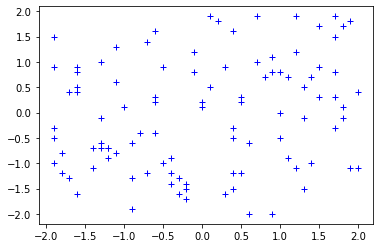

In [938]:
#Plot the random Dataset
plt.plot(x1,x2,"b+")

# Divide the dataset into 2 groups with a line

In [944]:
#m Is equal to the inclination of the line
#b Is equal to the intercept in the Y axis
m = random.randrange(-100,100)/100
b = random.randrange(-100,100)/100
print(f"m = {m}")
print(f"b = {b}")
def GraphSpaceWork(x1,x2):
    x = np.arange(-2,3)
    ax1 = []
    ax2 = []
    bx1 = []
    bx2 = []
    label = []
    for i in range(len(x1)):
        if x2[i] > x1[i]*m:
            ax1.append(x1[i])
            ax2.append(x2[i])
            label.append(1)
        else:
            bx1.append(x1[i])
            bx2.append(x2[i])
            label.append(-1)

    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.plot(ax1,ax2, "bo", marker = "$A$")
    plt.plot(bx1,bx2, "ro", marker = "$B$")
    
    
    return (ax1,ax2,bx1,bx2,label)

m = 0.95
b = 0.6


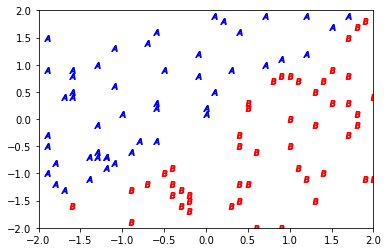

In [945]:
label = GraphSpaceWork(x1,x2)
#Set the labels
label = label[-1]
#print(label)
#print(x1)

# Class Perceptron

In [946]:
class Perceptron():
    def __init__(self,x1,x2,w1,w2,label,u):
        self.x1 = x1
        self.x2 = x2
        self.w1 = w1
        self.w2 = w2
        self.u = u
        self.label = label
    
    def Learn(self):
        classif = []
        #suma = sum(((self.w1*self.x1)+(self.w2*self.x2)))
        #suma = 0
        for i in range(len(self.x1)):
            f = self.w1*self.x1[i] + self.w2*self.x2[i] + self.u
            f = 1 if f > 0 else -1
            #print(f)
            #print(label[i])
            classif.append(1 if f == label[i] else -1)
        for i in range(len(classif)):
            if classif[i] == -1:
                self.w1 += self.label[i] * self.x1[i]
                self.w2 += self.label[i] * self.x2[i]
                self.u += self.label[i]
        if sum(classif)/len(classif) == 1:
            return 0
        
        
    def Graph(self):
        
        
        if self.w1 != 0:
            b = -(self.u/self.w1)
        else:
            b = -self.u

        m = -(self.w1/self.w2)
        
        x = np.arange(-2,3)
        
        GraphSpaceWork(self.x1,self.x2)
        
        plt.fill_between(x, (x*m) +b, 2, color='blue',alpha=0.3)
        plt.fill_between(x, (x*m) +b, -2, color='red',alpha=0.3)
        
        
        plt.show()
        print(m)

        
        
        
    
    
        

In [947]:
#Create Object Perceptron
a = Perceptron(x1,x2,random.randrange(10)/10,random.randrange(10)/10,label,0.5)

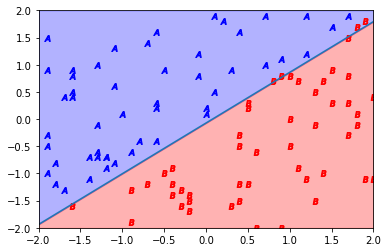

0.932562620423891
Cheese


In [950]:
#Train the model
while(True):
    a.Graph()
    if a.Learn() == 0:
        break
    
    